In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.cm as cm
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib inline
import numpy as np
from sklearn.neighbors import KDTree

First create some random 3d data points

In [24]:
N = 10  # The number of points
points = np.random.rand(N, 3)

Now create KDTree from these so that we can look for the neighbours. TBH we don't really need KDTree. We can do this probably better and easier with a distance matrix but this will do for now.

In [25]:
kdt = KDTree(points)

Test by looking for the two neighbours of the first point

In [26]:
kdt.query([points[0]], 3, False)

array([[0, 1, 6]], dtype=int64)

So the neighbous of 0 are point 2 and 4. ok.

Let's plot the 3d points and see them

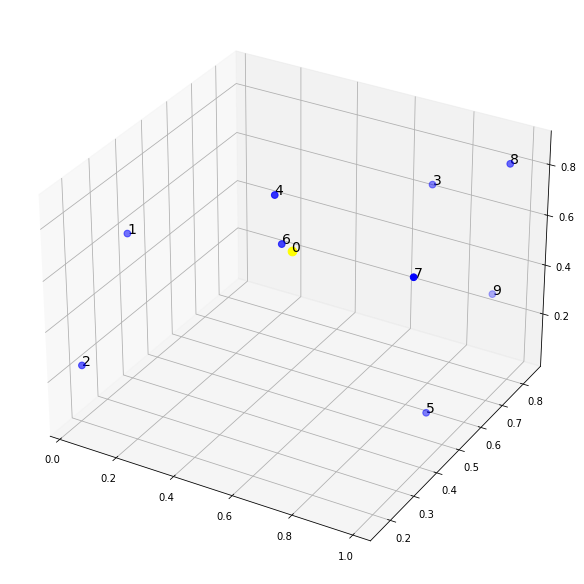

In [27]:
x = [p[0] for p in points]
y = [p[1] for p in points]
z = [p[2] for p in points]
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
ax = fig.add_subplot(projection='3d')

ax.scatter(points[0][0],points[0][1],points[0][2], c='yellow',s=75)
ax.scatter(x[1:],y[1:],z[1:],c='blue',s=45)
for i, p in enumerate(points):
    ax.text(p[0], p[1], p[2], str(i), fontsize=14)
plt.show()

Now we will look at the the algo and if it works...

added tri [0, 1, 6]
added tri [1, 2, 0]
added tri [2, 4, 6]
added tri [4, 3, 6]
added tri [3, 8, 6]
added tri [8, 7, 3]
added tri [7, 9, 3]
added tri [9, 5, 3]


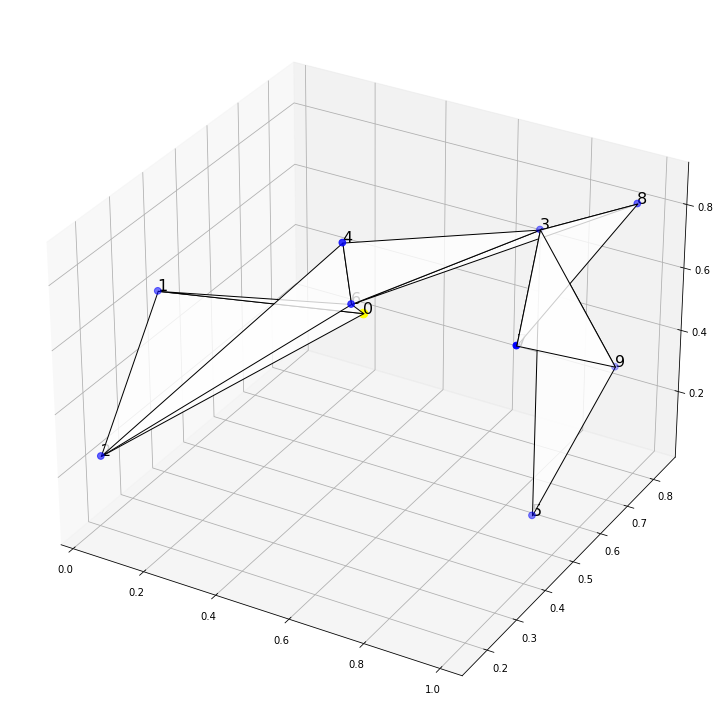

In [29]:
def gen_tris(points):
    processed_points = set()
    points_to_do = set(range(len(points)))
    tris = []
    # pick the first three points
    start = 0
    nns = kdt.query([points[start]], N, False)
    work_pts = nns[0][:3]
    tris.append(Poly3DCollection([[points[i] for i in work_pts]], edgecolors='black', facecolors='w', linewidths=1, alpha=0.8))
    for p in work_pts:
        processed_points.add(p)
    print(f'added tri [{work_pts[0]}, {work_pts[1]}, {work_pts[2]}]')
    start = work_pts[1]
    while True:
        nns = kdt.query([points[start]], N, False)
        for p in nns[0]:
            if p in processed_points:
                continue
            nns2 = kdt.query([points[p]], N, False)
            for p2 in nns2[0]:
                if p2 in processed_points and p2 != start:
                    break
            print(f'added tri [{start}, {p}, {p2}]')
            tris.append(Poly3DCollection([[points[start], points[p], points[p2]]],edgecolors='black',facecolors='w', linewidths=1, alpha=0.8))
            processed_points.add(p)
            start = p
            break
        if len(processed_points) == len(points):
            break
    return tris

tris = gen_tris(points)
# and show the points and the triangles
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
# ax = Axes3D(fig, auto_add_to_figure=False)
ax = fig.add_subplot(111, projection='3d')

fig.add_axes(ax)
ax.scatter(points[0][0],points[0][1],points[0][2], c='yellow',s=75)
ax.scatter(x[1:],y[1:],z[1:],c='blue',s=45)

for p in tris:
    ax.add_collection3d(p)

for i, p in enumerate(points):
    ax.text(p[0], p[1], p[2], str(i), fontsize=16)
    
plt.show()


It does. Sort of...